
A few years ago, a discrimination lawsuit was filed against the California DDS claiming that White Non-Hispanics were receiving more funding than Hispanics. If this was true, the DDS faced some serious implications. In order to investigate the issue, several statisticians were hired to further analyze the data. In this example, we will replicate some of their findings.

First, we must load the necessary packages, and then load in our data set.

几年前，加州 DDS 被提起歧视诉讼，声称非西班牙裔白人比西班牙裔获得更多资金。 如果这是真的，DDS 将面临一些严重的影响。 为了调查这个问题，聘请了几位统计学家来进一步分析数据。 在此示例中，我们将复制他们的一些发现。

首先，我们必须加载必要的包，然后加载我们的数据集。

In [ ]:
if (!require(ggplot2)) {
  install.packages("ggplot2")
  library(ggplot2)
}
if (!require(plotly)) {
  install.packages("plotly")
  library(plotly)
}
if (!require("tidyverse")) {
  install.packages("tidyverse")
}

In [ ]:
# 从URL下载并读取CSV数据
url <- "https://raw.githubusercontent.com/KaonToPion/datasets/main/californiaDDSDataV2.csv"  # 将URL替换为实际的URL
californiaData <- read.csv(url)

# 显示数据的前几行
head(californiaData)
str(californiaData)
summary(californiaData)

,Id,Age.Cohort,Age,Gender,Expenditures,Ethnicity
,<int>,<chr>,<int>,<chr>,<int>,<chr>
1,10210,13 to 17,17,Female,2113,White not Hispanic
2,10409,22 to 50,37,Male,41924,White not Hispanic
3,10486,0 to 5,3,Male,1454,Hispanic
4,10538,18 to 21,19,Female,6400,Hispanic
5,10568,13 to 17,13,Male,4412,White not Hispanic
6,10690,13 to 17,15,Female,4566,Hispanic


'data.frame':	1000 obs. of  6 variables:
 $ Id          : int  10210 10409 10486 10538 10568 10690 10711 10778 10820 10823 ...
 $ Age.Cohort  : chr  "13 to 17" "22 to 50" "0 to 5" "18 to 21" ...
 $ Age         : int  17 37 3 19 13 15 13 17 14 13 ...
 $ Gender      : chr  "Female" "Male" "Male" "Female" ...
 $ Expenditures: int  2113 41924 1454 6400 4412 4566 3915 3873 5021 2887 ...
 $ Ethnicity   : chr  "White not Hispanic" "White not Hispanic" "Hispanic" "Hispanic" ...


       Id         Age.Cohort             Age          Gender         
 Min.   :10210   Length:1000        Min.   : 0.0   Length:1000       
 1st Qu.:31809   Class :character   1st Qu.:12.0   Class :character  
 Median :55384   Mode  :character   Median :18.0   Mode  :character  
 Mean   :54663                      Mean   :22.8                     
 3rd Qu.:76135                      3rd Qu.:26.0                     
 Max.   :99898                      Max.   :95.0                     
  Expenditures    Ethnicity        
 Min.   :  222   Length:1000       
 1st Qu.: 2899   Class :character  
 Median : 7026   Mode  :character  
 Mean   :18066                     
 3rd Qu.:37713                     
 Max.   :75098                     

After viewing the summary, this sample of 1000 individuals seems like a good representation of the state of California as a whole. The ages look to be semi-uniformly distributed, and the ethnicity frequencies seem to accurately represent the demographic proportions in the state.

Now, we are interested in determining if there is any ethnic bias regarding the expenditures. First, let's look at the mean expenditure per ethnicity to see if the initial claim of discrimination holds any weight.

查看摘要后，这 1000 人的样本似乎很好地代表了整个加利福尼亚州。 年龄看起来是半均匀分布的，种族频率似乎准确地代表了该州的人口比例。

现在，我们有兴趣确定支出是否存在种族偏见。 首先，让我们看看每个种族的平均支出，看看最初的歧视主张是否成立。

In [ ]:
sort(round(tapply(californiaData$Expenditures, californiaData$Ethnicity, mean), 2))

Other         Multi Race           Hispanic              Asian 
           3316.50            4456.73           11065.57           18392.37 
             Black White not Hispanic    American Indian    Native Hawaiian 
          20884.59           24697.55           36438.25           42782.33

Given this information, it seems very reasonable to assume that there is a bias in the allocation of funding. Let's get a different perspective of how the different ethnicities compare to one another by creating a box plot.

鉴于此信息，假设资金分配存在偏差似乎非常合理。 让我们通过创建箱形图来从不同的角度了解不同种族之间的比较。

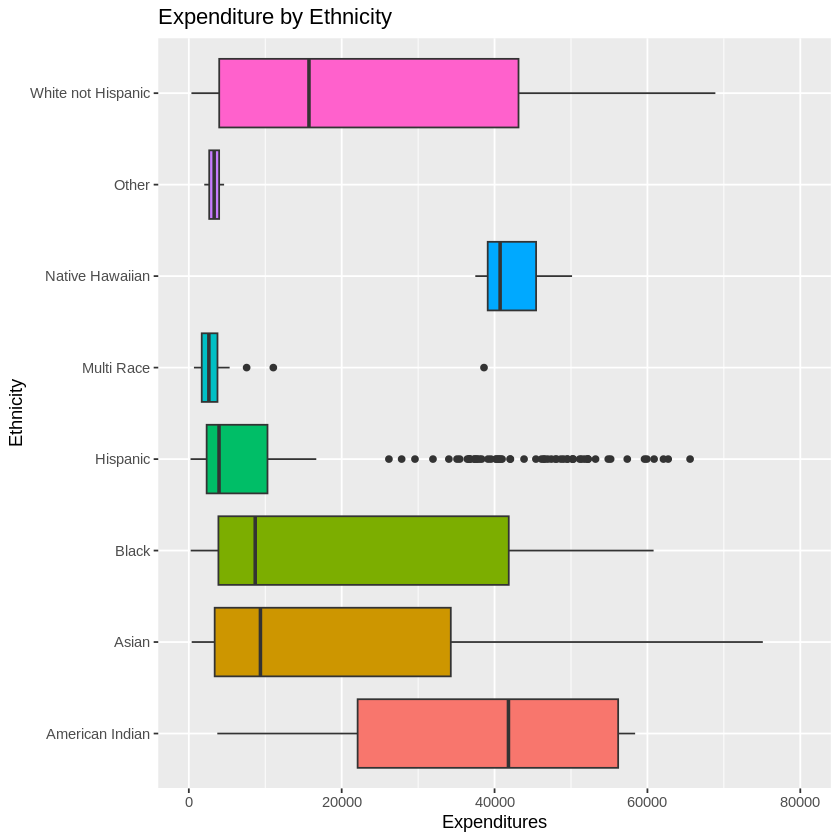

In [ ]:
allDataBoxplot <- ggplot(californiaData, aes(Ethnicity, Expenditures, fill = Ethnicity)) +
                geom_boxplot() + expand_limits(y=c(0, 80000))
allDataBoxplot + coord_flip() + guides(fill=FALSE) + ggtitle("Expenditure by Ethnicity")

Whoa. From this graph, it looks like there is discrimination towards multiple different ethnic groups, and you can see where the lawsuit arose from.

However, any statistician worth their salt knows that certain conclusions can be obscured, or even debunked, when only working with a subset of the available variables. So, let's explore some of the other variables to see if they might have an effect on expenditures.

Let's begin with gender. Is there a significant difference in expenditure between females and males?

哇哦。 从这张图来看，似乎存在对多个不同种族群体的歧视，你可以看到诉讼是从哪里产生的。

然而，任何称职的统计学家都知道，当仅使用可用变量的子集时，某些结论可能会被掩盖，甚至被揭穿。 因此，让我们探讨一些其他变量，看看它们是否会对支出产生影响。

让我们从性别开始。 女性和男性的支出是否存在显着差异？

In [ ]:
round(tapply(californiaData$Expenditures, californiaData$Gender, mean), 2)

Female     Male 
18129.61 18001.20

It looks like gender is not significant in terms of expenditure, which means that we can simplify future calculations by leaving the gender variable out.

What about Age? It is hard to group the data using the Age variable since it is continuous, so we will use the Age Cohort variable. Age Cohort is a factor with 6 levels: "0 to 5", "6 to 12", "13 to 17", "18 to 21", "22 to 50", and "51+". Now, let's group the data by age group and see what the mean expenditure is for each group.

看起来性别对于支出来说并不重要，这意味着我们可以通过忽略性别变量来简化未来的计算。

年龄呢？ 由于年龄变量是连续的，因此很难使用年龄变量对数据进行分组，因此我们将使用年龄队列变量。 年龄群体是一个有 6 个级别的因素：“0 至 5”、“6 至 12”、“13 至 17”、“18 至 21”、“22 至 50”和“51+”。 现在，让我们按年龄组对数据进行分组，看看每个组的平均支出是多少。

In [ ]:
sort(round(tapply(californiaData$Expenditures, californiaData$Age.Cohort, mean), 2))

0 to 5  6 to 12 13 to 17 18 to 21 22 to 50      51+ 
 1415.28  2226.86  3922.61  9888.54 40209.28 53521.90

Ok, now we're gettin' somewhere. It turns out that Age plays a massive role in the amount of funding that is received by an individual. The older a developmentally-disabled individual gets, the more it costs to take care of their needs. Makes sense, right? Maybe, just maybe, it would be a good idea to include Age Cohort in our analysis across ethnicities.

How do we account for age? Simple. We will create a separate box plot for each Age Cohort, and see if there is still a disperity in expenditures between each ethnicity. I've included the ethnicity frequencies as well. I have also specified that the y-axis range from 0 - 80,000 on every graph to truly capture the relative disparity between age groups.

好的，现在我们已经到达某个地方了。 事实证明，年龄对个人获得的资金数额起着重要作用。 发育障碍人士年龄越大，满足其需求的成本就越高。 有道理，对吧？ 也许，只是也许，将年龄群体纳入我们的跨种族分析中是个好主意。

我们如何考虑年龄？ 简单的。 我们将为每个年龄组创建一个单独的箱线图，看看每个种族之间的支出是否仍然存在差异。 我也包括了种族频率。 我还指定每个图表上的 y 轴范围为 0 - 80,000，以真正捕捉年龄组之间的相对差异。


             Asian              Black           Hispanic         Multi Race 
                 8                  3                 44                  7 
White not Hispanic 
                20 

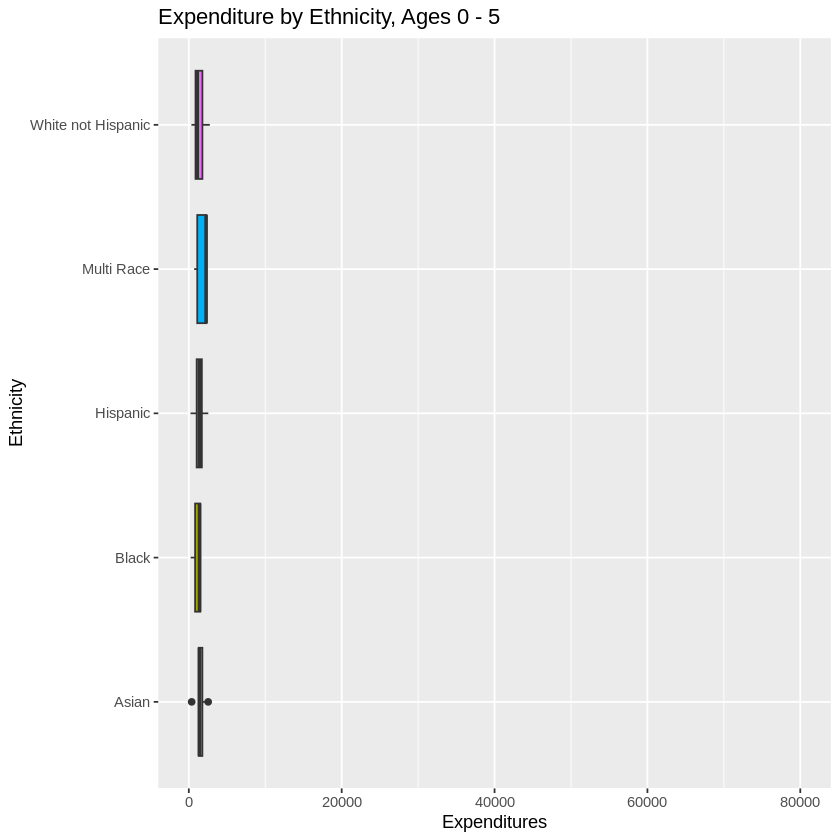

In [ ]:
table(subset(californiaData, Age.Cohort == "0 to 5")$Ethnicity)
ageGroup1Boxplot <- ggplot(subset(californiaData, Age.Cohort == "0 to 5"), aes(Ethnicity, Expenditures, fill = Ethnicity)) +
                    geom_boxplot() + expand_limits(y=c(0, 80000))
ageGroup1Boxplot + coord_flip() + guides(fill=FALSE) + ggtitle("Expenditure by Ethnicity, Ages 0 - 5")


             Asian              Black           Hispanic         Multi Race 
                18                 11                 91                  9 
White not Hispanic 
                46 

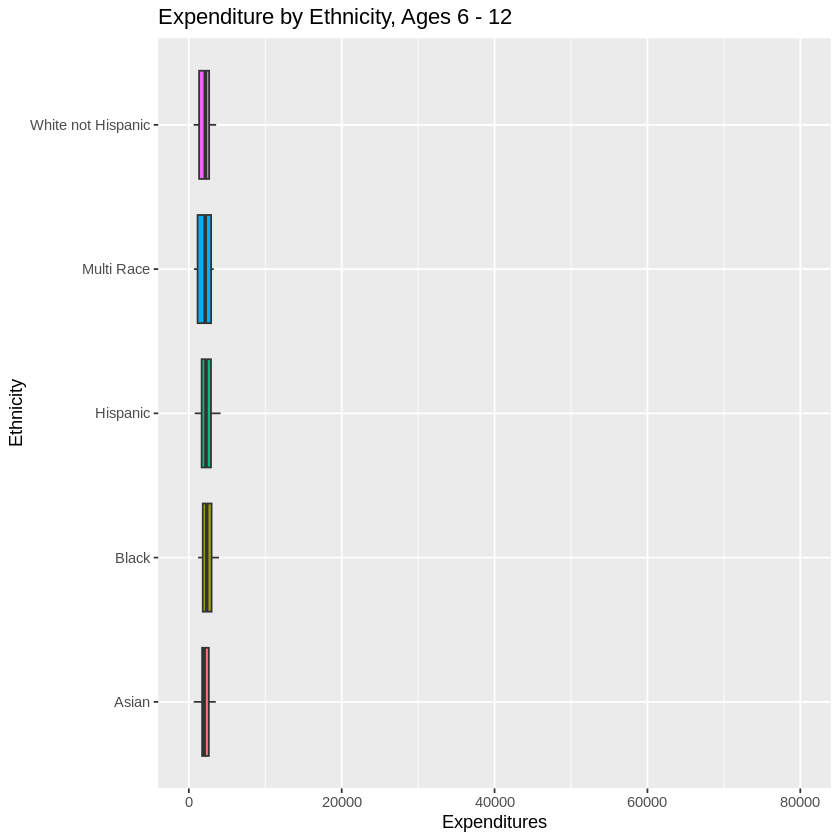

In [ ]:
table(subset(californiaData, Age.Cohort == "6 to 12")$Ethnicity)
ageGroup2Boxplot <- ggplot(subset(californiaData, Age.Cohort == "6 to 12"), aes(Ethnicity, Expenditures, fill = Ethnicity)) +
                    geom_boxplot() + expand_limits(y=c(0, 80000))
ageGroup2Boxplot + coord_flip() + guides(fill=FALSE) + ggtitle("Expenditure by Ethnicity, Ages 6 - 12")


   American Indian              Asian              Black           Hispanic 
                 1                 20                 12                103 
        Multi Race              Other White not Hispanic 
                 7                  2                 67 

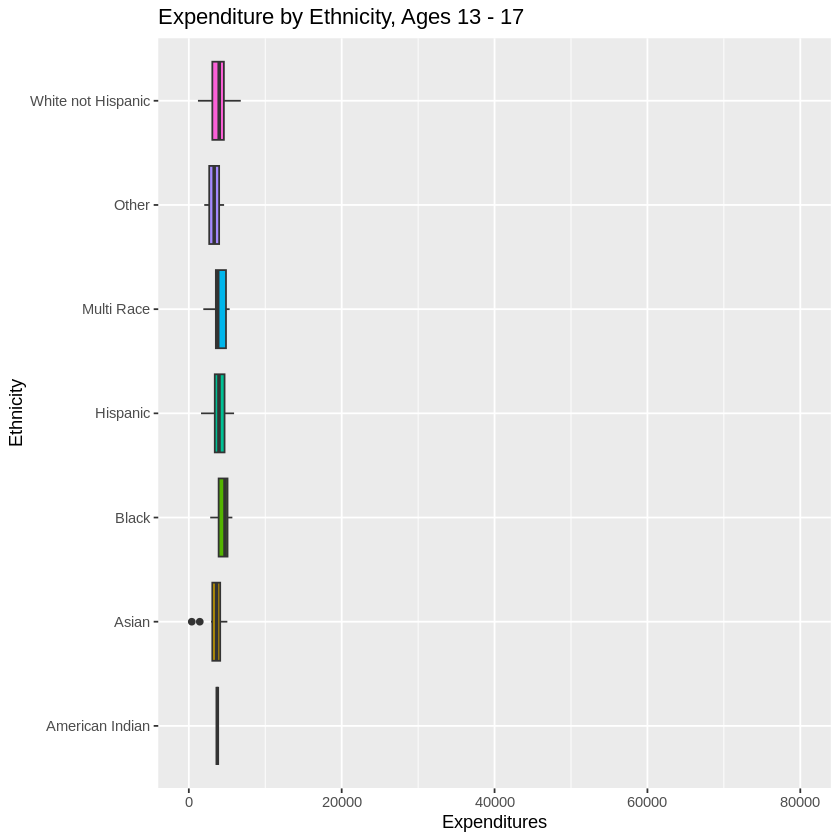

In [ ]:
table(subset(californiaData, Age.Cohort == "13 to 17")$Ethnicity)
ageGroup3Boxplot <- ggplot(subset(californiaData, Age.Cohort == "13 to 17"), aes(Ethnicity, Expenditures, fill = Ethnicity)) +
                    geom_boxplot() + expand_limits(y=c(0, 80000))
ageGroup3Boxplot + coord_flip() + guides(fill=FALSE) + ggtitle("Expenditure by Ethnicity, Ages 13 - 17")


             Asian              Black           Hispanic         Multi Race 
                41                  9                 78                  2 
White not Hispanic 
                69 

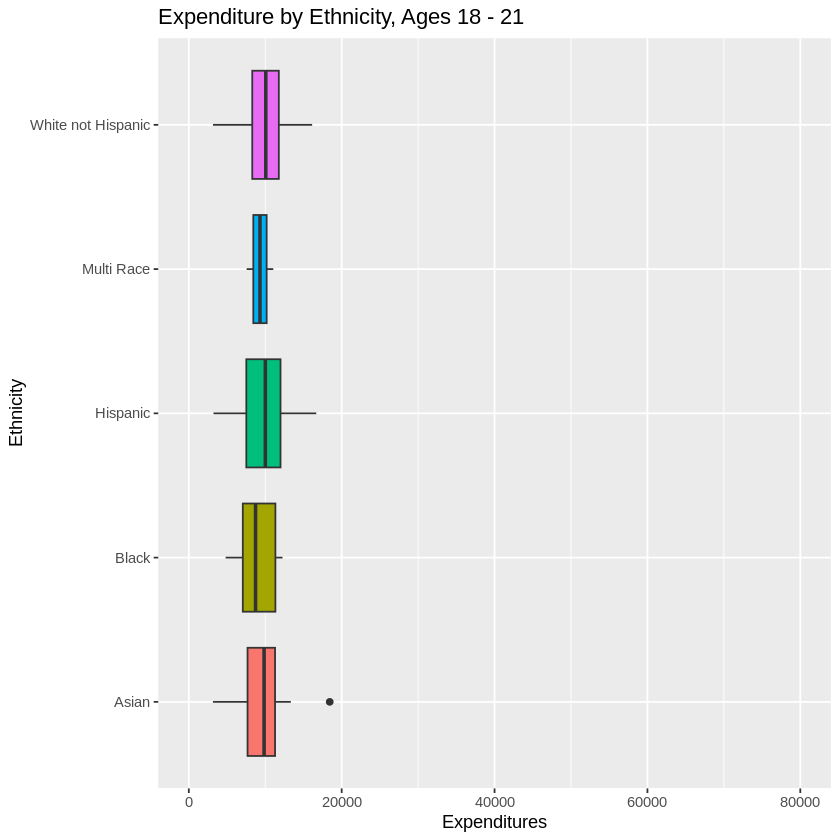

In [ ]:
table(subset(californiaData, Age.Cohort == "18 to 21")$Ethnicity)
ageGroup4Boxplot <- ggplot(subset(californiaData, Age.Cohort == "18 to 21"), aes(Ethnicity, Expenditures, fill = Ethnicity)) +
                    geom_boxplot() + expand_limits(y=c(0, 80000))
ageGroup4Boxplot + coord_flip() + guides(fill=FALSE) + ggtitle("Expenditure by Ethnicity, Ages 18 - 21")


   American Indian              Asian              Black           Hispanic 
                 1                 29                 17                 43 
        Multi Race    Native Hawaiian White not Hispanic 
                 1                  2                133 

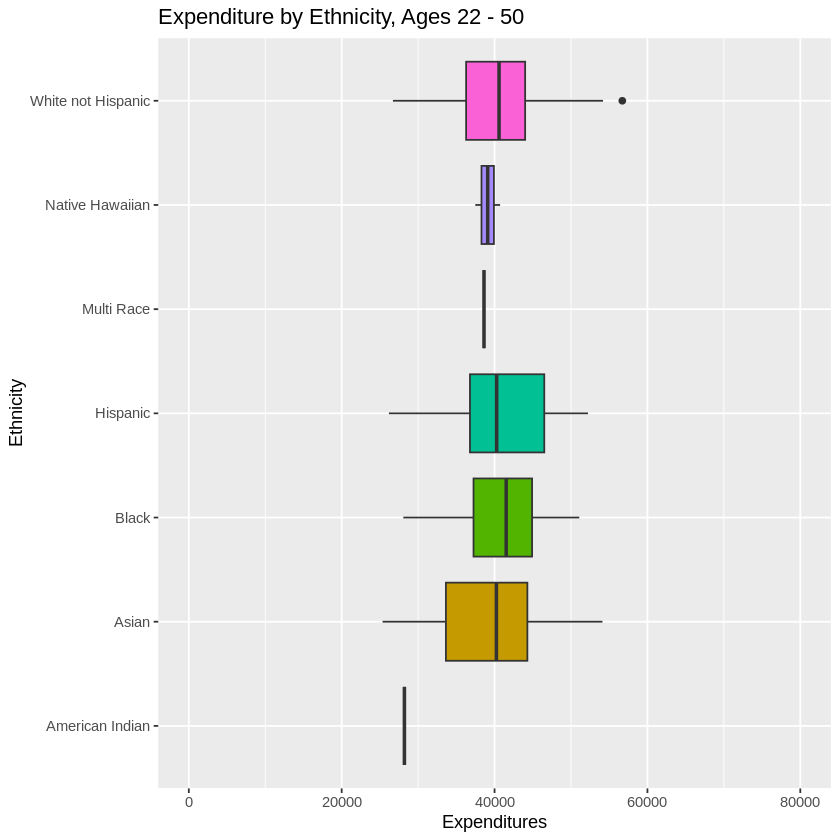

In [ ]:
table(subset(californiaData, Age.Cohort == "22 to 50")$Ethnicity)
ageGroup5Boxplot <- ggplot(subset(californiaData, Age.Cohort == "22 to 50"), aes(Ethnicity, Expenditures, fill = Ethnicity)) +
                    geom_boxplot() + expand_limits(y=c(0, 80000))
ageGroup5Boxplot + coord_flip() + guides(fill=FALSE) + ggtitle("Expenditure by Ethnicity, Ages 22 - 50")


   American Indian              Asian              Black           Hispanic 
                 2                 13                  7                 17 
   Native Hawaiian White not Hispanic 
                 1                 66 

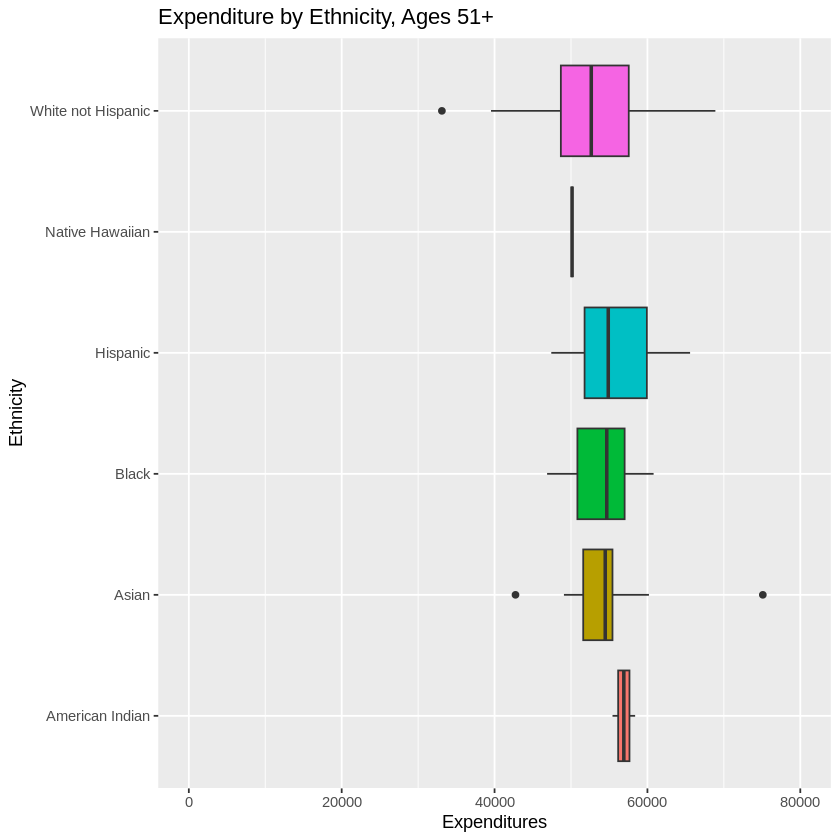

In [ ]:
table(subset(californiaData, Age.Cohort == "51+")$Ethnicity)
ageGroup6Boxplot <- ggplot(subset(californiaData, Age.Cohort == "51+"), aes(Ethnicity, Expenditures, fill = Ethnicity)) +
                    geom_boxplot() + expand_limits(y=c(0, 80000))
ageGroup6Boxplot + coord_flip() + guides(fill=FALSE) + ggtitle("Expenditure by Ethnicity, Ages 51+")

It turns out that there is no discrimination towards any ethnicity when the expenditures are broken down by age group, a conclusion that is completly opposite from the original claim. In fact, in a couple age groups, Hispanics receive slightly more funding on average than White Non-Hispanics. This is a classic example of Simpson's paradox.

It is also worth noting that, in the boxplot of all the combined data, American Indians seemed to receive drastically more funding than most other ethnicities. However, notice that there are only 4 total American Indians in our full data set and 3 of them are in the two oldest age groups (or the two age groups that have the highest average expenditure).

This data set is a prime example of how important it is to explore data for confounding variables. Had no one taken the time to look past the initial conclusion, the state of California would have been unjustly accused of discrimination. However, statistics saved the day. Maybe someday it will save the world.

Thanks for following along. Give me an upvote if you enjoyed this kernel!

事实证明，当支出按年龄组进行细分时，并不存在对任何种族的歧视，这一结论与最初的说法完全相反。 事实上，在几个年龄段中，西班牙裔人平均获得的资助略多于非西班牙裔白人。 这是辛普森悖论的典型例子。

还值得注意的是，在所有综合数据的箱线图中，美洲印第安人似乎比大多数其他种族获得了更多的资金。 然而，请注意，我们的完整数据集中只有 4 名美洲印第安人，其中 3 人属于两个最古老的年龄组（或平均支出最高的两个年龄组）。

该数据集是一个很好的例子，说明探索数据中的混杂变量是多么重要。 如果没有人花时间去审视最初的结论，加利福尼亚州就会被不公正地指责为歧视。 然而，统计数据挽救了局面。 也许有一天它会拯救世界。

感谢您的关注。 如果您喜欢这个内核，请给我点赞！